___
# Binary Logistics Regression for Sales Leads Dataset

___

This Leads Dataset is taken from the marketing dataset of X Education, an online education company that sells courses to industry professionals. 

X Education has marketing for their courses online, across several websites and different search engines such as Google, Facebook, and organic search. Users who land on the website can browse through the courses, watch videos, or fill out a form with their information. Thus when the form is filled out, these people become leads, a potential client or customer, but one that hasn't yet been qualified as a prospect. They are then contacted by the sales team via email or phone, and this process is recorded in the data.

The company has noticed that some of their leads get converted into actually customers, while most do not. Tpically, less than 1/3 of these prospects become customers. 

In order to make the process more efficient, E Education wants a way to identify leads which have the most potential, utilizing the given data. This will be done by creating a binary logistics regression. This will predict which class a unit will fall into when there are only two classes - Converted or Not Converted.


The full dataset can be found on Kaggle at [this link](https://www.kaggle.com/ashydv/leads-dataset) 

# Source a Dataset
___

In [530]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [531]:
df = pd.read_csv("leads.csv")
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [532]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [533]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [597]:
df.shape

(9074, 8)

# Formulate a Hypothesis about the Data
___

# Clean the Data
___

### Duplicated Data

First, check for any data that is duplicated. We can get rid of any duplicated values because it is just repetitive. 

In [535]:
df[df.duplicated()]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


The are no duplicate values, so we can move on to the next step of removing NaN values.

## NanN Values

In [536]:
df.head(5)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


Another thing to keep in mind, is that the value 'Select' is present throughout the data, as you can see above. This just meant that the user did not select an answer, and this value can be treated the same as NaN.

In [537]:
df = df.replace('Select', np.nan)

A heat map can give a high level visualization of any missing data.

Text(0.5, 1, 'Amount of NaN Values')

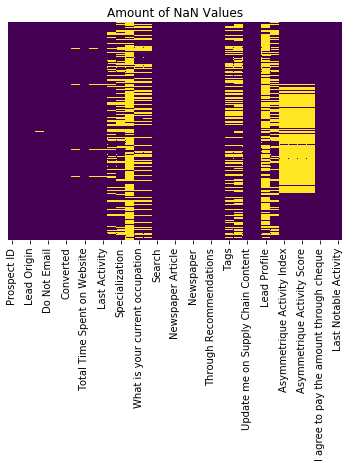

In [538]:
sns.heatmap(df.isnull(),yticklabels=False, cbar=False, cmap='viridis')
plt.title("Amount of NaN Values")

The above heatmap shows that are many missing values. However, instead of cleaning all the data one by one, I can drop columns that will not be used. There are columns that have over half of the data missing, and dont contain useful information for the model.


In [539]:
def NaNValue(df): return df[df.isnull().any(axis=1)]
NaNValue(df).head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified



These are all the values that contain NaN values:

In [540]:
print(df.isnull().sum())

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [541]:
# Drop all the rest besides these 'Converted', Lead Origin','Lead Source','Do Not Email','Do Not Call','TotalVisits','Total Time Spent on Website','Page Views Per Visit'

df = df.drop(['Prospect ID',
'Lead Number',
'Last Activity',
'Country',
'Specialization',
'How did you hear about X Education',
'What is your current occupation',
'What matters most to you in choosing a course',
'Search',
'Magazine',
'Newspaper Article',
'X Education Forums',
'Newspaper',
'Digital Advertisement',
'Through Recommendations',
'Receive More Updates About Our Courses',
'Tags',
'Lead Quality',
'Update me on Supply Chain Content',
'Get updates on DM Content',
'Lead Profile',
'City',
'Asymmetrique Activity Index',
'Asymmetrique Profile Index',
'Asymmetrique Activity Score',
'Asymmetrique Profile Score',
'I agree to pay the amount through cheque',
'A free copy of Mastering The Interview',
'Last Notable Activity'], axis=1)

In [542]:
df.head(5)

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
0,API,Olark Chat,No,No,0,0.0,0,0.0
1,API,Organic Search,No,No,0,5.0,674,2.5
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0


In [543]:
print(df.isnull().sum())

Lead Origin                      0
Lead Source                     36
Do Not Email                     0
Do Not Call                      0
Converted                        0
TotalVisits                    137
Total Time Spent on Website      0
Page Views Per Visit           137
dtype: int64


#### Cleaning 'Lead Source'

In [544]:
df['Lead Source'].unique()

array(['Olark Chat', 'Organic Search', 'Direct Traffic', 'Google',
       'Referral Sites', 'Welingak Website', 'Reference', 'google',
       'Facebook', nan, 'blog', 'Pay per Click Ads', 'bing',
       'Social Media', 'WeLearn', 'Click2call', 'Live Chat',
       'welearnblog_Home', 'youtubechannel', 'testone', 'Press_Release',
       'NC_EDM'], dtype=object)

Since 'Lead Source' is connected to the source that the user selected through the advertisement, we can't use an average, instead we can drop these NaN values

In [545]:
df = df.dropna(subset=['Lead Source'])

#### Cleaning 'TotalVisits'

In [546]:
print(df['TotalVisits'].unique())

[  0.   5.   2.   1.   4.   8.  11.   6.   3.   7.  13.  17.  nan   9.
  12.  10.  16.  14.  21.  15.  22.  19.  18.  20.  43.  30.  23.  55.
 141.  25.  27.  29.  24.  28.  26.  74.  41.  54. 115. 251.  32.  42.]


In [547]:
df['TotalVisits'].describe()

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

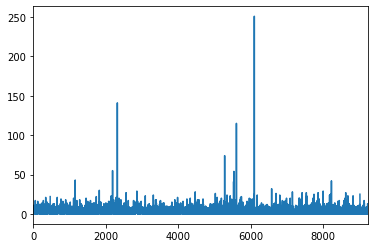

In [548]:
df['TotalVisits'].plot()

There are some obvious outliers in the data. However, it's not clear if this is because the data is incorrect, or there actually were a large number of visits. 
I will only take the super extreme cases, any value over 50, and change them to the mean, in order to keep the data more consistent.


In [549]:
df[df['TotalVisits']>50] 

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
2190,Landing Page Submission,Direct Traffic,Yes,No,0,55.0,297,55.00
2322,Landing Page Submission,Direct Traffic,Yes,No,0,141.0,755,6.71
5283,Landing Page Submission,Direct Traffic,Yes,No,0,74.0,1209,12.33
5538,Landing Page Submission,Referral Sites,No,No,0,54.0,1280,4.50
5608,Landing Page Submission,Referral Sites,Yes,No,0,115.0,187,8.21
6102,Landing Page Submission,Direct Traffic,No,No,1,251.0,49,1.48


In [550]:
df.loc[[2190,2322,5283,5538,5608,6102], 'TotalVisits'] = df['TotalVisits'].mean()
df.loc[[2190,2322,5283,5538,5608,6102]]

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
2190,Landing Page Submission,Direct Traffic,Yes,No,0,3.456028,297,55.00
2322,Landing Page Submission,Direct Traffic,Yes,No,0,3.456028,755,6.71
5283,Landing Page Submission,Direct Traffic,Yes,No,0,3.456028,1209,12.33
5538,Landing Page Submission,Referral Sites,No,No,0,3.456028,1280,4.50
5608,Landing Page Submission,Referral Sites,Yes,No,0,3.456028,187,8.21
6102,Landing Page Submission,Direct Traffic,No,No,1,3.456028,49,1.48


Now we can remove the NaN and view the plot below with the outliers removed:

In [551]:
df = df.dropna(subset=['TotalVisits'])

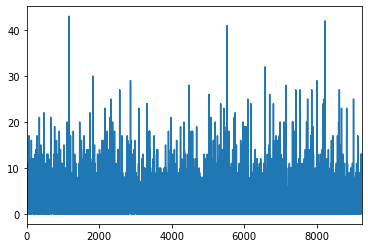

In [552]:
df['TotalVisits'].plot()

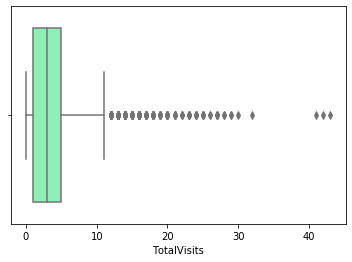

In [553]:
sns.boxplot(x='TotalVisits', data=df, palette='rainbow')

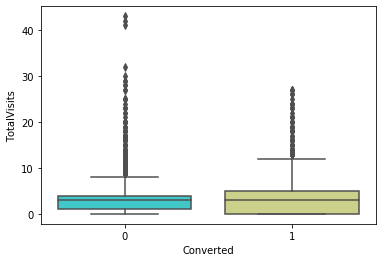

In [554]:
sns.boxplot(y='TotalVisits', x='Converted', data=df, palette='rainbow')

#### Cleaning 'Page Views Per Visit'

In [555]:
print(df['Page Views Per Visit'].unique())

[ 0.    2.5   2.    1.    4.    8.    2.67 11.    5.    6.    3.    1.33
  1.5   3.5   7.    2.33 13.    8.5   5.5   1.67  4.5   3.33 16.   12.
  1.71  1.8   6.5   4.33 14.    3.4  10.    1.25  1.75  2.63 15.    2.25
  3.67  1.43  9.    2.6   4.75  1.27  3.25  5.33  2.57  2.17  2.75  2.8
  2.2   2.86  3.91  1.4   5.67  3.2   1.38  2.09  2.4  55.    5.25  6.71
  3.57  2.22  1.83  3.6   1.2   1.57  1.56  5.4   4.25  1.31  1.6   2.9
  1.23  1.78  3.83  7.5   1.14  2.71  1.45  2.38  1.86  2.29  1.21 12.33
  3.43  2.56  6.33  1.64  8.21  4.4   3.17  8.33  1.48  1.22 24.    3.75
  6.67  1.54  2.13  2.14  2.45  3.29  4.17  1.63  3.38  1.17 14.5   3.8
  1.19  3.82  2.83  1.93 11.5   2.08]


In [556]:
df['Page Views Per Visit'].describe()

count    9074.000000
mean        2.370151
std         2.160871
min         0.000000
25%         1.000000
50%         2.000000
75%         3.200000
max        55.000000
Name: Page Views Per Visit, dtype: float64

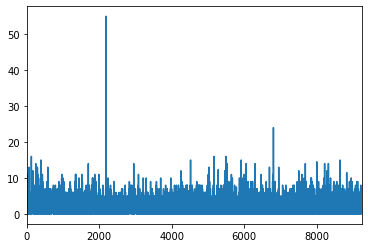

In [557]:
df['Page Views Per Visit'].plot()

There are some extreme outliers. Again, because we can't prove if the data is accurate or not, I will only remove the extreme outliers to ensure the data is accurate, and remove the NaN.

In [558]:
df[df['Page Views Per Visit']>20]

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
2190,Landing Page Submission,Direct Traffic,Yes,No,0,3.456028,297,55.0
6805,API,Organic Search,No,No,1,24.000000,1527,24.0


In [559]:
df.loc[[2190,6805], 'Page Views Per Visit'] = df['Page Views Per Visit'].mean()
df.loc[[2190,6805]]

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
2190,Landing Page Submission,Direct Traffic,Yes,No,0,3.456028,297,2.370151
6805,API,Organic Search,No,No,1,24.000000,1527,2.370151


In [560]:
df = df.dropna(subset=['Page Views Per Visit'])

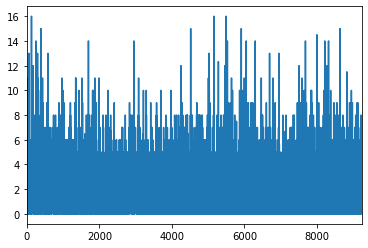

In [561]:
df['Page Views Per Visit'].plot()

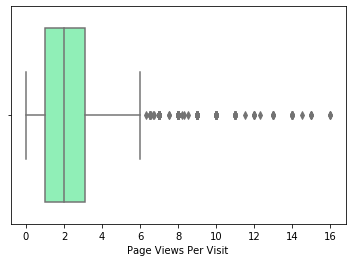

In [562]:
sns.boxplot(x='Page Views Per Visit', data=df, palette='rainbow')

All the NaN values and extreme outliers are gone now.

In [563]:
print(df.isnull().sum())

Lead Origin                    0
Lead Source                    0
Do Not Email                   0
Do Not Call                    0
Converted                      0
TotalVisits                    0
Total Time Spent on Website    0
Page Views Per Visit           0
dtype: int64


# Exploritory Data Analysis & Visuals
___

In [564]:
df.corr()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
Converted,1.000000,0.045951,0.359261,0.000980
TotalVisits,0.045951,1.000000,0.306000,0.661902
Total Time Spent on Website,0.359261,0.306000,1.000000,0.330016
Page Views Per Visit,0.000980,0.661902,0.330016,1.000000


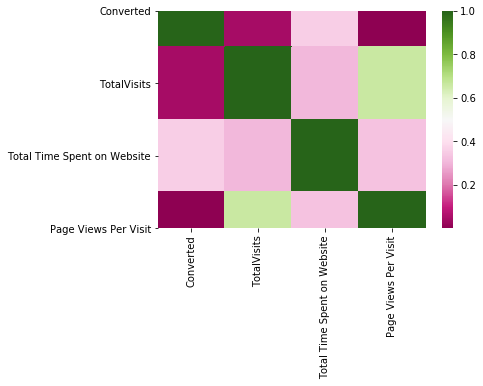

In [565]:
sns.heatmap(data=df.corr(), cmap="PiYG")

C:\Users\Visitor\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Visitor\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\Visitor\Anaconda3\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\Visitor\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


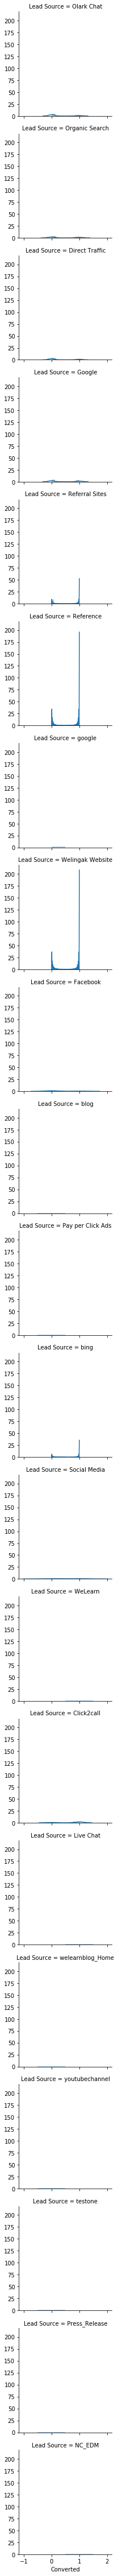

In [566]:
facet_grid = sns.FacetGrid(df, row='Lead Source')
facet_grid.map(sns.distplot, "Converted")

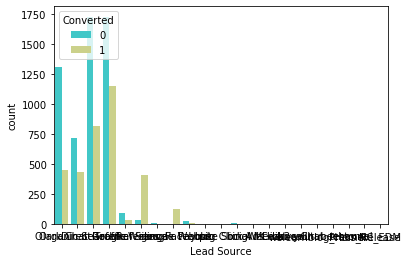

In [567]:
sns.countplot(data=df, x="Lead Source", hue="Converted", palette='rainbow')

# Create a Model - Logistics Regression
___

### Classifying Categorical Data

First, I'll need to map the values to a binary value. The columns 'Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call' will all need to be mapped

In [568]:
print(df['Lead Origin'].unique(), '\n')
print(df['Lead Source'].unique(), '\n')
print(df['Do Not Email'].unique(), '\n')
print(df['Do Not Call'].unique(), '\n')

['API' 'Landing Page Submission' 'Lead Add Form' 'Lead Import'] 

['Olark Chat' 'Organic Search' 'Direct Traffic' 'Google' 'Referral Sites'
 'Reference' 'google' 'Welingak Website' 'Facebook' 'blog'
 'Pay per Click Ads' 'bing' 'Social Media' 'WeLearn' 'Click2call'
 'Live Chat' 'welearnblog_Home' 'youtubechannel' 'testone' 'Press_Release'
 'NC_EDM'] 

['No' 'Yes'] 

['No' 'Yes'] 



In [569]:
df['Lead Origin'] = df['Lead Origin'].map({'API':0, 'Landing Page Submission':1, 'Lead Add Form':2, 'Lead Import':3,'Quick Add Form':4})

In [570]:
df['Lead Source'] = df['Lead Source'].map({'Olark Chat':0, 'Organic Search':1, 'Direct Traffic':2, 'Google':3, 'Referral Sites':4, 'Welingak Website':5, 'Reference':6, 
'google':7, 'Facebook':8, 'blog':9, 'Pay per Click Ads':10, 'bing':11, 'Social Media':12, 'WeLearn':13, 'Click2call':14, 'Live Chat':15, 'welearnblog_Home':16, 'youtubechannel':17,
'testone':18, 'Press_Release':19, 'NC_EDM':20})

In [571]:
df['Do Not Email'] = df['Do Not Email'].map({'No':0, 'Yes':1})

In [572]:
df['Do Not Call'] = df['Do Not Call'].map({'No':0, 'Yes':1})

The below values, 'TotalVisits', 'Total Time Spend on Website', and 'Page Views Per Visit' are numerical so they can be kept as is.

In [573]:
print('TotalVisits:', df['TotalVisits'].unique(), '\n') 
print('Total Time Spent on Website:', df['Total Time Spent on Website'].unique(), '\n')
print('Page Views Per Visit:', df['Page Views Per Visit'].unique(), '\n')

TotalVisits: [ 0.          5.          2.          1.          4.          8.
 11.          6.          3.          7.         13.         17.
  9.         12.         10.         16.         14.         21.
 15.         22.         19.         18.         20.         43.
 30.         23.          3.45602821 25.         27.         29.
 24.         28.         26.         41.         32.         42.        ] 

Total Time Spent on Website: [   0  674 1532 ...  603  483  927] 

Page Views Per Visit: [ 0.          2.5         2.          1.          4.          8.
  2.67       11.          5.          6.          3.          1.33
  1.5         3.5         7.          2.33       13.          8.5
  5.5         1.67        4.5         3.33       16.         12.
  1.71        1.8         6.5         4.33       14.          3.4
 10.          1.25        1.75        2.63       15.          2.25
  3.67        1.43        9.          2.6         4.75        1.27
  3.25        5.33        2.57    

### Training Data Using Sklearn

In [585]:
feature_cols = ['Lead Origin','Lead Source','Do Not Email','Do Not Call','TotalVisits','Total Time Spent on Website','Page Views Per Visit']

X = df[feature_cols] # This is the features we have
y = df.Converted # This is the target variable

In [601]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

# Validation Techniques
___

The Dataset is broken into two parts, 75% for the model training and 25% for the model testing.

In [588]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)

In [589]:
np.sum(y_test)

802

In [590]:
np.sum(y_pred)

676

In [586]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[1269,  198],
       [ 324,  478]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

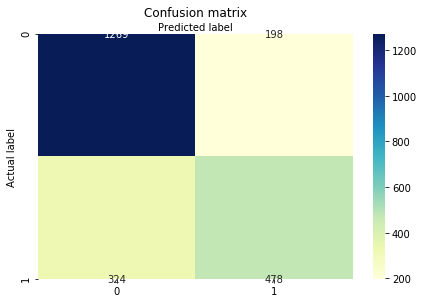

In [591]:
matrix=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(matrix))
plt.xticks(tick_marks, matrix)
plt.yticks(tick_marks, matrix)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [584]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.7699427060379022
